# Portfolio with the Maximum Calmar Ratio for the Pharma Sector 

In [1]:
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Establishing Dates
start = "2017-01-01"
end = "2021-1-1"

# Establishing Assets
assets = ['SUNPHARMA.NS', 'DRREDDY.NS', 'DIVISLAB.NS', 'CIPLA.NS', 'LUPIN.NS',
         'LAURUSLABS.NS', 'AUROPHARMA.NS', 'BIOCON.NS', 'ALKEM.NS']



#252 trading days in a year
N = 252

#1% risk free rate
rf =0.02

# Creating an empty dataframe
df_prices = pd.DataFrame()

# Getting the "Adj Close" data from Yahoo Finance by defining a function
# This function lists the price data as daily percent change 
def YahooData(dataframe, assets_list, start_date, end_date):
    for i in assets_list:
        dataframe[i] = data.DataReader(i, data_source = "yahoo", start=start_date, end=end_date)['Adj Close']
    return dataframe

# Running the function that we just made and saving the results to the DataFrame
df = YahooData(df_prices, assets, start, end)

# Calculating Log Return
df = np.log(df/df.shift(1))

# Dropping the first row because it's N/A
df = df.dropna()

# Viewing df head
df

SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  CIPLA.NS  LUPIN.NS  \
Date                                                                    
2017-01-03      0.003228   -0.003574    -0.025387  0.013425 -0.000166   
2017-01-04      0.001963    0.006133    -0.033399 -0.009458 -0.011020   
2017-01-05      0.009525    0.014436     0.015433  0.020208  0.015395   
2017-01-06     -0.004205    0.007275    -0.035437  0.005160 -0.000033   
2017-01-09     -0.013671   -0.031823    -0.004417 -0.010608 -0.015026   
...                  ...         ...          ...       ...       ...   
2020-12-28     -0.005945    0.000000     0.004364 -0.003667  0.007704   
2020-12-29      0.006199   -0.006983     0.004821 -0.002654 -0.006629   
2020-12-30     -0.011238    0.001035     0.004088 -0.005025  0.000358   
2020-12-31      0.014197    0.006583     0.011045 -0.004684 -0.000767   
2021-01-01      0.006562    0.006940     0.001859  0.008077  0.024322   

            LAURUSLABS.NS  AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
Date                                                           
2017-01-03      -0.020879      -0.004897  -0.007010  0.020078  
2017-01-04      -0.001786      -0.007841  -0.012133  0.007344  
2017-01-05       0.001786       0.028527   0.013085 -0.003244  
2017-01-06      -0.007586       0.008922   0.014010 -0.001234  
2017-01-09       0.005379       0.003100   0.054750  0.012750  
...                   ...            ...        ...       ...  
2020-12-28      -0.001293      -0.000715  -0.034084  0.000309  
2020-12-29      -0.005188      -0.003640  -0.011443  0.002876  
2020-12-30       0.011493       0.001877  -0.003916  0.001076  
2020-12-31       0.008817       0.015919   0.014501 -0.000769  
2021-01-01       0.000708       0.006977   0.000752  0.008355  

[988 rows x 9 columns]

In [3]:
# Creating 10000 random simulations of each portfolio weight configuration
num_runs = 10000 # number of rows/iterations

# Creating a Matrix with 10000 rows, with each row representing a random portfolio:
    #first 3 columns are Mean Returns, Standard Deviation, and Sortino Ratio
    # remaining columns are each assets random weight within that random portfolio
result = np.zeros((num_runs,(len(assets)+3)))
result

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
df = df.copy()

for i in range(num_runs):
    
    # randomized weights
    weights = np.array(np.random.random(len(assets))) 
    #Rebalance w/ constraints (SUM of all weights CANNOT BE > 1)
    weights = weights/np.sum(weights)
    
    ### daily return of the portfolio based on a given set of weights
    df['portfolio_ret'] = df.iloc[:,0]*weights[0]+df.iloc[:,1]*weights[1]+df.iloc[:,2]*weights[2]
  
                       
    # Calculating mean
    E = df['portfolio_ret'].mean()
    
    
    # Annualizing mean
    E = E*252
    

    
    # Calculating Drawdown
    def max_drawdown(return_series):
        comp_ret = (return_series+1).cumprod()
        peak = comp_ret.expanding(min_periods=1).max()
        dd = 1 - (comp_ret/peak)
        return dd.max()

    max_drawdown = max_drawdown(df['portfolio_ret'])
   
    #Calculating Annualised Calmar
    Calmar = E / max_drawdown
    
                   
    # Populating the 'result' array with the required values: Mean, Drawdown, Calmar followed by the weights                   
    result[i,0] = E
    result[i,1] = max_drawdown
    result[i,2] = Calmar
    
    for j in range(len(assets)):
        result[i,j+3]= weights[j]

In [5]:
# Converting 'result' into a DataFrame

columns = ['Mean','Drawdown', 'Calmar'] + assets

result = pd.DataFrame(result,columns=columns)
result

Mean  Drawdown    Calmar  SUNPHARMA.NS  DRREDDY.NS  DIVISLAB.NS  \
0     0.093531  0.100709  0.928723      0.008471    0.131678     0.181209   
1     0.057945  0.073519  0.788175      0.025020    0.093247     0.108578   
2     0.069780  0.114233  0.610857      0.098124    0.121915     0.128875   
3     0.077727  0.140281  0.554083      0.168802    0.115749     0.151986   
4     0.036575  0.128413  0.284820      0.099304    0.202526     0.019549   
...        ...       ...       ...           ...         ...          ...   
9995  0.075424  0.130154  0.579498      0.130416    0.127866     0.141228   
9996  0.062975  0.084855  0.742149      0.061973    0.084651     0.124691   
9997  0.085415  0.135639  0.629727      0.162798    0.087313     0.180629   
9998  0.039198  0.121378  0.322943      0.140080    0.139056     0.049319   
9999  0.116662  0.167634  0.695931      0.120050    0.193846     0.218002   

      CIPLA.NS  LUPIN.NS  LAURUSLABS.NS  AUROPHARMA.NS  BIOCON.NS  ALKEM.NS  
0     0.078559  0.169462       0.149635       0.044752   0.112224  0.124009  
1     0.150912  0.186180       0.209580       0.055745   0.037470  0.133268  
2     0.092519  0.212259       0.013898       0.072925   0.049798  0.209687  
3     0.156847  0.059531       0.066966       0.003734   0.131220  0.145165  
4     0.155022  0.148879       0.107651       0.079695   0.138991  0.048384  
...        ...       ...            ...            ...        ...       ...  
9995  0.032210  0.094684       0.174456       0.018364   0.110140  0.170635  
9996  0.073912  0.065507       0.190087       0.211543   0.076231  0.111406  
9997  0.079086  0.089408       0.153792       0.154439   0.031475  0.061062  
9998  0.120925  0.106712       0.076349       0.074345   0.128000  0.165212  
9999  0.016210  0.119959       0.037111       0.125058   0.029398  0.140366  

[10000 rows x 12 columns]

In [6]:
Max_Calmar = result.iloc[result['Calmar'].idxmax()]
Max_Calmar

Mean             0.108193
Drawdown         0.094871
Calmar           1.140426
SUNPHARMA.NS     0.000227
DRREDDY.NS       0.028768
DIVISLAB.NS      0.253139
CIPLA.NS         0.058983
LUPIN.NS         0.239292
LAURUSLABS.NS    0.010653
AUROPHARMA.NS    0.266516
BIOCON.NS        0.128236
ALKEM.NS         0.014185
Name: 718, dtype: float64

In [7]:
Min_Drawdown = result.iloc[result['Drawdown'].idxmin()]
Min_Drawdown

Mean             0.003281
Drawdown         0.013183
Calmar           0.248904
SUNPHARMA.NS     0.017549
DRREDDY.NS       0.012405
DIVISLAB.NS      0.003989
CIPLA.NS         0.220059
LUPIN.NS         0.157032
LAURUSLABS.NS    0.106720
AUROPHARMA.NS    0.007678
BIOCON.NS        0.118989
ALKEM.NS         0.355578
Name: 9630, dtype: float64

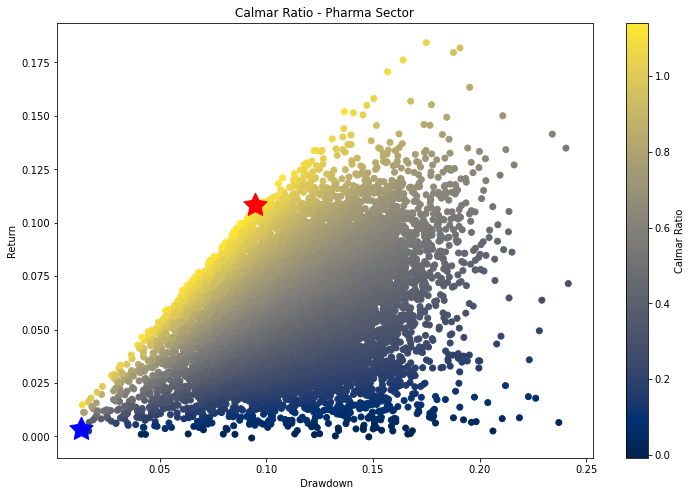

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(x=result['Drawdown'],y=result['Mean'],c=result['Calmar'],cmap='cividis')
plt.colorbar(label='Calmar Ratio')
plt.xlabel(' Drawdown')
plt.ylabel('Return')

plt.title('Calmar Ratio - Pharma Sector')
#Plot a red star to highlight position of the portfolio with highest Sortino Ratio
plt.scatter(Max_Calmar[1],Max_Calmar[0],marker=(5,1,0),color='r',s=600)

#Plot a blue star to highlight position of the portfolio with minimum Variance
plt.scatter(Min_Drawdown[1],Min_Drawdown[0],marker=(5,1,0),color='b',s=600)
plt.show()